# FSM Demo

### Step 1. Preparation
With the overlay downloaded, users have to specify the state machine in the following format.

In [1]:
from pynq import Overlay

Overlay('interface.bit').download()

fsm_spec = {'inputs': [('reset','D0'), ('direction','D1')],
        'outputs': [('alpha','D3'), ('beta','D4'), ('gamma','D5')],
        'states': ['S0', 'S1', 'S2', 'S3', 'S4', 'S5'],
        'transitions': [['00', 'S0', 'S1', '000'],
                        ['01', 'S0', 'S5', '000'],
                        ['00', 'S1', 'S2', '001'],
                        ['01', 'S1', 'S0', '001'],
                        ['00', 'S2', 'S3', '010'],
                        ['01', 'S2', 'S1', '010'],
                        ['00', 'S3', 'S4', '011'],
                        ['01', 'S3', 'S2', '011'],
                        ['00', 'S4', 'S5', '100'],
                        ['01', 'S4', 'S3', '100'],
                        ['00', 'S5', 'S0', '101'],
                        ['01', 'S5', 'S4', '101'],
                        ['1-', '*',  'S0', '']]}

### Step 2: Instantiate FSM generator
Internally the `fsm_spec` will be parsed. Users can also explicitly call 
```python
fsm.parse_fsm_spec(fsm_spec)
```
to parse the FSM state machine manually.

To use the analyzer at the same time, specify `use_analyzer=True`.

In [2]:
from pynq.intf import ARDUINO
from pynq.intf import FSMGenerator

fsm = FSMGenerator(ARDUINO, fsm_spec, use_analyzer=True)

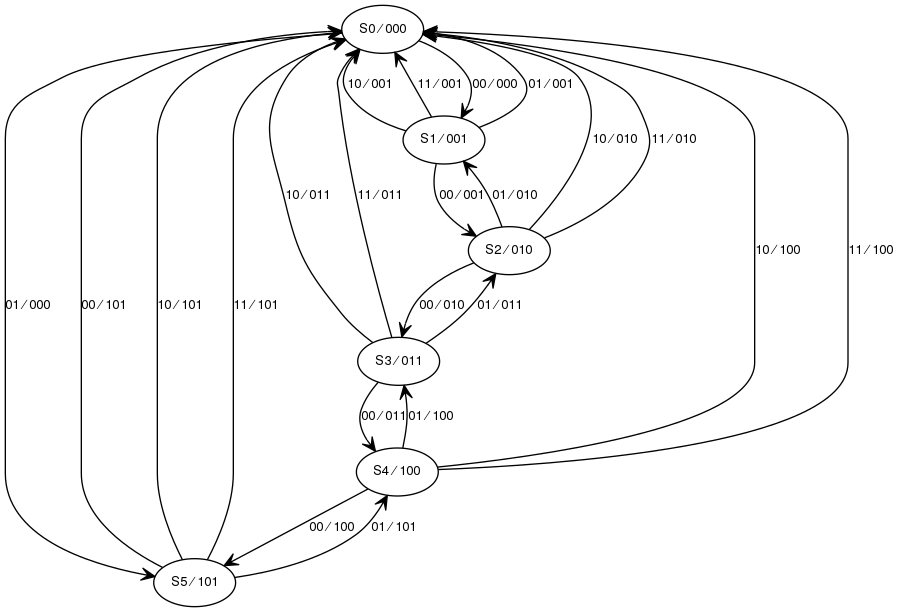

In [3]:
fsm.display()

### Step 3: Counting up
The following example shows a trace of 20 samples. We connect both `D0` and `D1` to `GND`, expecting the counter to count up.

In [4]:
fsm.start(num_samples=20, frequency_mhz=10)
fsm.waveform.display()

### Step 4: Counting down
Similarly, we can capture the trace again for counting down. We connect `D0` to `GND`, and `D1` to `Vref`.

In [ ]:
fsm.start(num_samples=20, frequency_mhz=10)
fsm.waveform.display()

### Step 5: Generating another FSM
If users want the state bits to be shown as output as well, `use_state_bits` has to be set to `True`. If there are not enough output pins, the last few output pins will be used for the state bits (replacing the ones users have specified).

In [5]:
from pprint import pprint

fsm_spec = {'inputs': [('rst','D0'), ('direction','D1')],
        'outputs': [('overflow','D2')],
        'states': ['S0', 'S1', 'S2', 'S3'],
        'transitions': [['00', 'S0', 'S1', '0'],
                        ['01', 'S0', 'S3', '0'],
                        ['00', 'S1', 'S2', '0'],
                        ['01', 'S1', 'S0', '0'],
                        ['00', 'S2', 'S3', '0'],
                        ['01', 'S2', 'S1', '0'],
                        ['00', 'S3', 'S0', '1'],
                        ['01', 'S3', 'S2', '1'],
                        ['1-', '*',  'S0', '']]}

fsm.stop()
fsm_spec_m = fsm.parse_fsm_spec(fsm_spec,use_state_bits=True)
pprint(fsm_spec_m)

{'inputs': [('rst', 'D0'), ('direction', 'D1')],
 'outputs': [('overflow', 'D2'), ('state_bit1', 'D4'), ('state_bit0', 'D3')],
 'states': ['S0', 'S1', 'S2', 'S3'],
 'transitions': [['00', 'S0', 'S1', '000'],
                 ['01', 'S0', 'S3', '000'],
                 ['00', 'S1', 'S2', '001'],
                 ['01', 'S1', 'S0', '001'],
                 ['00', 'S2', 'S3', '010'],
                 ['01', 'S2', 'S1', '010'],
                 ['00', 'S3', 'S0', '111'],
                 ['01', 'S3', 'S2', '111'],
                 ['1-', '*', 'S0', '']]}


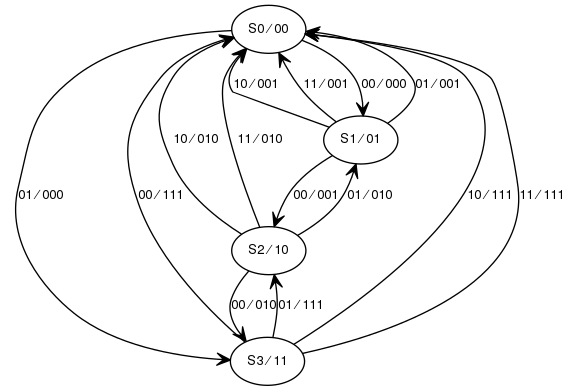

In [6]:
fsm.display()

In [8]:
fsm.start(num_samples=20)
fsm.waveform.display()

In [9]:
fsm.waveform.waveform_dict

{'foot': {'tock': 1},
 'head': {'text': 'Finite State Machine', 'tick': 1},
 'signal': [['analysis',
   {'name': 'rst', 'pin': 'D0', 'wave': 'l...................'},
   {'name': 'direction', 'pin': 'D1', 'wave': 'l...................'},
   {'name': 'overflow', 'pin': 'D2', 'wave': 'hl..hl..hl..hl..hl..'},
   {'name': 'state_bit0', 'pin': 'D3', 'wave': 'hlhlhlhlhlhlhlhlhlhl'},
   {'name': 'state_bit1', 'pin': 'D4', 'wave': 'hl.h.l.h.l.h.l.h.l.h'}]]}